In [1]:
import os

# 方法1：使用os模块
current_dir = os.getcwd()
print("当前工作目录：", current_dir)

当前工作目录： C:\Users\小马琴


In [2]:
!pip install opencv-python matplotlib

In [1]:
import os

# 检查文件是否存在
file_path = 'zhangzhou_.jpg'
if os.path.exists(file_path):
    print("✅ 文件存在！路径：", os.path.abspath(file_path))
else:
    print("❌ 文件不存在！当前目录内容：", os.listdir('.'))

✅ 文件存在！路径： C:\Users\小马琴\zhangzhou_.jpg


🕵️ 正在尝试读取： E:\AI\zhangzhou_.jpg


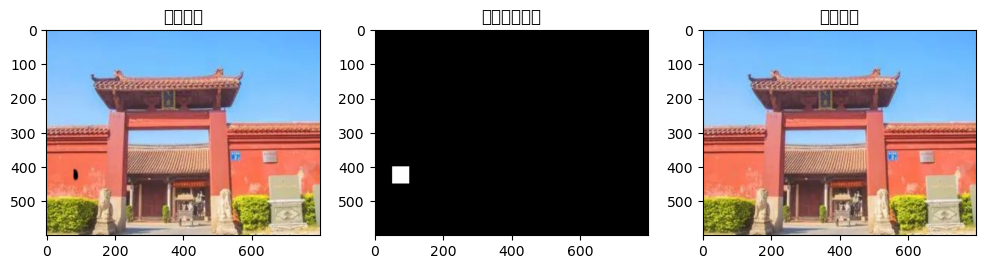

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ===== 1. 安全读取图片 =====
def safe_read_image(file_name):
    # 获取绝对路径
    current_dir = os.getcwd()
    full_path = os.path.join(current_dir, file_name)
    print("🕵️ 正在尝试读取：", full_path)
    
    # 验证文件存在性
    if not os.path.exists(full_path):
        raise FileNotFoundError(f"文件 {file_name} 不存在！请检查路径和文件名")
    
    # 读取图片
    img = cv2.imread(full_path)
    if img is None:
        raise ValueError("OpenCV读取失败！可能原因：文件损坏或非图片格式")
    
    return img

# ===== 2. 主流程 =====
try:
    # 读取并预处理
    img = safe_read_image('E:\AI\zhangzhou_.jpg')
    img = cv2.resize(img, (800, 600))
    
    # 手动创建掩膜（示例：修复左上角区域）
    mask = np.zeros(img.shape[:2], np.uint8)
    mask[400:450, 50:100] = 255  # 修改坐标范围匹配你的划痕位置
    
    # 修复图像
    restored = cv2.inpaint(img, mask, 10, cv2.INPAINT_NS)
    
    # 显示结果
    plt.figure(figsize=(12,6))
    plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('原始图片')
    plt.subplot(132), plt.imshow(mask, cmap='gray'), plt.title('修复区域掩膜')
    plt.subplot(133), plt.imshow(cv2.cvtColor(restored, cv2.COLOR_BGR2RGB)), plt.title('修复结果')
    plt.show()

except Exception as e:
    print("🔥 发生错误：", str(e))